<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/hamming_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import comb
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [51]:
def ham_bound(q, n, d):
  if d > n:
    return
  t = int(np.floor((d-1)/2))
  num = q**n
  den = np.sum([comb(n, k) *(q - 1)**k for k in range(0, t+1)])
  return int(num/den)

def dist2ham(dist):
  return int(np.floor((dist-1)/2))

In [40]:
q = 4
bclen = 8
dist = 4
# if pairs of words are separated by distance d they can be corrected within hamming floor(d-1)/2
ham = dist2ham(dist)
print(ham)
ham_bound(q, bclen, dist)

1


2621

In [39]:
q**bclen

65536

In [44]:
q = 3
dist = 3
ham = dist2ham(dist)
print(ham)

[ham_bound(q, i, dist) for i in range(5, 9)]

1


[22, 56, 145, 385]

In [16]:
q**bclen

243

In [52]:
q = 3
dist = 3
ham = dist2ham(dist)
print(ham)
ham_bound(q, 2, dist)

1


In [ ]:
00
01
10
11

In [66]:
dists = np.arange(3, 15, 2)
hams = [dist2ham(i) for i in dists]
bc_lens = np.arange(8, 19)

data = np.zeros((len(bc_lens), len(dists)))

for i, bclen in enumerate(bc_lens):
  for j, dist in enumerate(dists):
    data[i, j] = ham_bound(q, bclen, dist)

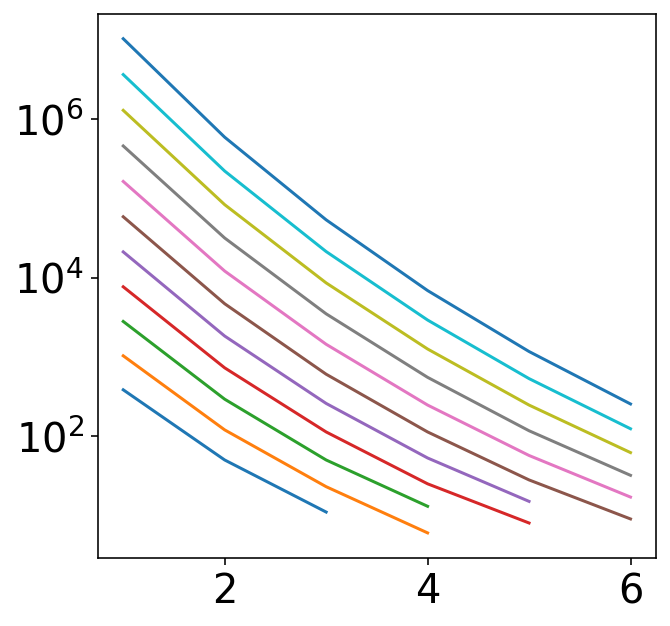

In [67]:
fig, ax = plt.subplots(figsize=(5,5))

for d in data:
  ax.plot(hams, d)

ax.set(**{
    "yscale": "log"
})
fig.show()

In [68]:
hams

[1, 2, 3, 4, 5, 6]

In [70]:

target_assays = [
                 "10xCRISPR",
                 "10xFB",
                 "clicktag",
                 "cellhash",
                 "multiseq",
                 "tapseq",
]


target_lengths = [
                  19,
                  15,
                  11,
                  12,
                  8,
                  19,
]

In [71]:
q = 4
dist = 8
ham = dist2ham(dist)
mat = []
for a, bclen in zip (target_assays, target_lengths):
  mat.append((a, bclen, ham_bound(q, bclen, ham)))

In [72]:
import pandas as pd

In [73]:
pd.DataFrame(mat, columns=["assay", "target_len", "ham_bound"])

,assay,target_len,ham_bound
0,10xCRISPR,19,4739274257
1,10xFB,15,23342213
2,clicktag,11,123361
3,cellhash,12,453438
4,multiseq,8,2621
5,tapseq,19,4739274257


In [74]:
ham

3